In [3]:
import pandas as pd
import seaborn as sns

### Pivot

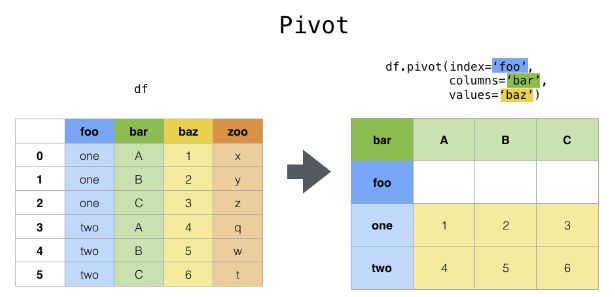

In [4]:
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [7]:
df.pivot(index="month", columns="year", values="passengers")

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


### Pivot tables


In [10]:
df = sns.load_dataset('mpg')

In [11]:
import numpy as np
df.pivot_table("horsepower", "cylinders","origin", aggfunc=np.mean )

origin,europe,japan,usa
cylinders,,,
3,NaN,99.250000,NaN
4,78.311475,75.579710,80.956522
5,82.333333,NaN,NaN
6,113.500000,115.833333,99.671233
8,NaN,NaN,158.300971


In [12]:
import numpy as np
df.pivot_table("horsepower", "cylinders","origin", aggfunc=np.mean
              )

origin,europe,japan,usa
cylinders,,,
3,NaN,99.250000,NaN
4,78.311475,75.579710,80.956522
5,82.333333,NaN,NaN
6,113.500000,115.833333,99.671233
8,NaN,NaN,158.300971


#### Crosstab

In [13]:
pd.crosstab(df.cylinders, df.origin)

origin,europe,japan,usa
cylinders,,,
3,0,4,0
4,63,69,72
5,3,0,0
6,4,6,74
8,0,0,103


In [10]:
pd.crosstab([df.cylinders, df.origin], df.marque)

marque            amc  audi  bmw  buick  cadillac  capri  chevroelt  \
cylinders origin                                                      
3         japan     0     0    0      0         0      0          0   
4         europe    0     5    2      0         0      0          0   
          japan     0     0    0      0         0      0          0   
          usa       3     0    0      3         0      1          0   
5         europe    0     2    0      0         0      0          0   
6         europe    0     0    0      0         0      0          0   
          japan     0     0    0      0         0      0          0   
          usa      17     0    0      7         0      0          1   
8         usa       8     0    0      7         2      0          0   

marque            chevrolet  chevy  chrysler  ...  renault  saab  subaru  \
cylinders origin                              ...                          
3         japan           0      0         0  ...        0     0       0   
4         europe          0      0         0  ...        5     4       0   
          japan           0      0         0  ...        0     0       4   
          usa            15      1         1  ...        0     0       0   
5         europe          0      0         0  ...        0     0       0   
6         europe          0      0         0  ...        0     0       0   
          japan           0      0         0  ...        0     0       0   
          usa            10      0         1  ...        0     0       0   
8         usa            18      2         4  ...        0     0       0   

marque            toyota  toyouta  triumph  vokswagen  volkswagen  volvo  vw  
cylinders origin                                                              
3         japan        0        0        0          0           0      0   0  
4         europe       0        0        1          1          15      4   6  
          japan       22        1        0          0           0      0   0  
          usa          0        0        0          0           0      0   0  
5         europe       0        0        0          0           0      0   0  
6         europe       0        0        0          0           0      2   0  
          japan        3        0        0          0           0      0   0  
          usa          0        0        0          0           0      0   0  
8         usa          0        0        0          0           0      0   0  

[9 rows x 37 columns]

In [11]:
pd.crosstab(df.cylinders, df.origin,df.horsepower,aggfunc= np.mean)

origin,europe,japan,usa
cylinders,,,
3,NaN,99.250000,NaN
4,78.311475,75.579710,80.956522
5,82.333333,NaN,NaN
6,113.500000,115.833333,99.671233
8,NaN,NaN,158.300971


#### Melt

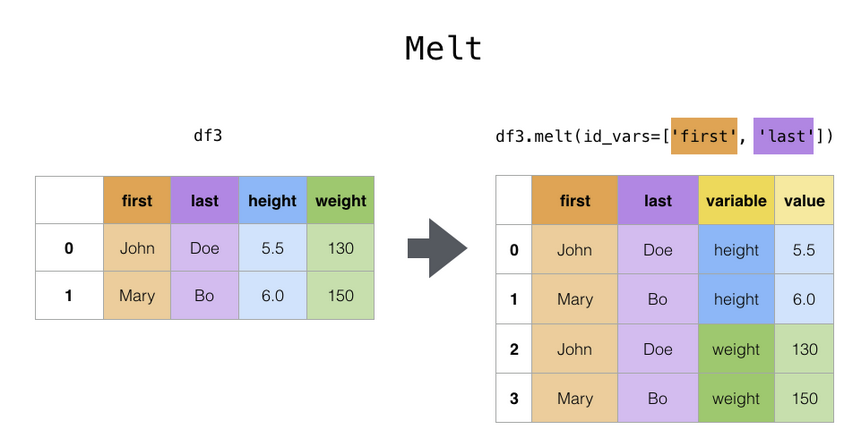

[documentation](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt)

In [15]:
df = sns.load_dataset('mpg')
df = (
    df.assign(
        marque =lambda x: x.name.str.split(" ").str[0],
        modele = lambda x: x.name.str.split(" ").str[1:]
                          .apply(lambda x: " ".join(x[:]) ## TODO: Pas très joli, trouver une manière de faire plus efficace
                     ))
)

In [16]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,marque,modele
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino


In [17]:
df.melt(id_vars = ["origin","marque"], )

,origin,marque,variable,value
0,usa,chevrolet,mpg,18.0
1,usa,buick,mpg,15.0
2,usa,plymouth,mpg,18.0
3,usa,amc,mpg,16.0
4,usa,ford,mpg,17.0
...,...,...,...,...
3577,usa,ford,modele,mustang gl
3578,europe,vw,modele,pickup
3579,usa,dodge,modele,rampage
3580,usa,ford,modele,ranger


### Stack et Unstack

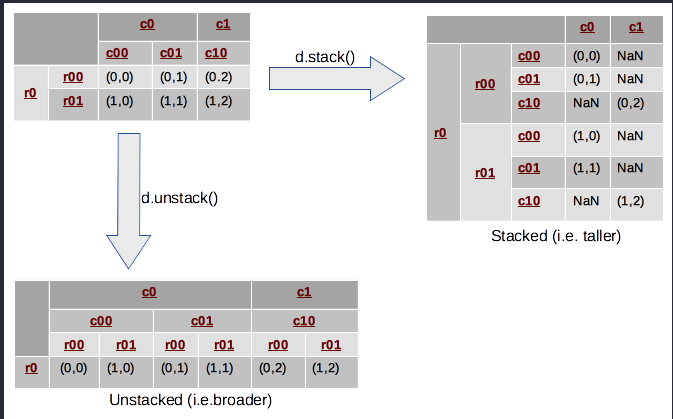

### Stack
Fait passer les colonnes en lignes (en les ajoutant à l'index)

In [18]:
df2 = df.set_index("marque")

In [19]:
df2.stack().head()

marque                 
chevrolet  mpg              18.0
           cylinders           8
           displacement    307.0
           horsepower      130.0
           weight           3504
dtype: object

### Unstack
C'est l'inverse de stack: prends un index et le fait passer en colonnes

In [20]:
df.groupby(["origin","marque"]).mean().head()

mpg  cylinders  displacement  horsepower  \
origin marque                                                          
europe audi           26.714286   4.285714    111.857143   86.714286   
       bmw            23.750000   4.000000    121.000000  111.500000   
       fiat           28.912500   4.000000     92.125000   73.375000   
       mercedes       25.400000   5.000000    183.000000   77.000000   
       mercedes-benz  23.250000   5.000000    157.000000   93.500000   

                           weight  acceleration  model_year  
origin marque                                                
europe audi           2556.142857     15.942857   75.714286  
       bmw            2417.000000     12.650000   73.500000  
       fiat           2143.125000     15.650000   74.250000  
       mercedes       3530.000000     20.100000   79.000000  
       mercedes-benz  3535.000000     19.250000   78.000000

In [15]:
df.groupby(["origin","cylinders"]).mean()

mpg  displacement  horsepower       weight  \
origin cylinders                                                     
europe 4          28.411111    104.222222   78.311475  2330.015873   
       5          27.366667    145.000000   82.333333  3103.333333   
       6          20.100000    159.750000  113.500000  3382.500000   
japan  3          20.550000     72.500000   99.250000  2398.500000   
       4          31.595652     99.768116   75.579710  2153.492754   
       6          23.883333    156.666667  115.833333  2882.000000   
usa    4          27.840278    124.284722   80.956522  2437.166667   
       6          19.663514    226.283784   99.671233  3213.905405   
       8          14.963107    345.009709  158.300971  4114.718447   

                  acceleration  model_year  
origin cylinders                            
europe 4             16.722222   75.507937  
       5             18.633333   79.000000  
       6             16.425000   78.250000  
japan  3             13.250000   75.500000  
       4             16.569565   77.507246  
       6             13.550000   78.000000  
usa    4             16.526389   78.027778  
       6             16.474324   75.635135  
       8             12.955340   73.902913

In [16]:
df.groupby(["origin","cylinders"]).mean().unstack(0)

mpg                       displacement              \
origin        europe      japan        usa       europe       japan   
cylinders                                                             
3                NaN  20.550000        NaN          NaN   72.500000   
4          28.411111  31.595652  27.840278   104.222222   99.768116   
5          27.366667        NaN        NaN   145.000000         NaN   
6          20.100000  23.883333  19.663514   159.750000  156.666667   
8                NaN        NaN  14.963107          NaN         NaN   

                       horsepower                               weight  \
origin            usa      europe       japan         usa       europe   
cylinders                                                                
3                 NaN         NaN   99.250000         NaN          NaN   
4          124.284722   78.311475   75.579710   80.956522  2330.015873   
5                 NaN   82.333333         NaN         NaN  3103.333333   
6          226.283784  113.500000  115.833333   99.671233  3382.500000   
8          345.009709         NaN         NaN  158.300971          NaN   

                                    acceleration                        \
origin           japan          usa       europe      japan        usa   
cylinders                                                                
3          2398.500000          NaN          NaN  13.250000        NaN   
4          2153.492754  2437.166667    16.722222  16.569565  16.526389   
5                  NaN          NaN    18.633333        NaN        NaN   
6          2882.000000  3213.905405    16.425000  13.550000  16.474324   
8                  NaN  4114.718447          NaN        NaN  12.955340   

          model_year                        
origin        europe      japan        usa  
cylinders                                   
3                NaN  75.500000        NaN  
4          75.507937  77.507246  78.027778  
5          79.000000        NaN        NaN  
6          78.250000  78.000000  75.635135  
8                NaN        NaN  73.902913

Notebook introduisant la notion (niveau débutant) : https://github.com/knathanieltucker/pandas-tutorial/blob/master/notebooks/Row-Column%20Transformations.ipynb

article très didactique sur la notion : https://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/

La documentation dans le user guide est très longue et très détaillée sur le sujet (mais un peu ardue) : https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt  . Certaines notions ne sont pas vues (explode, factorize, tiling, etc)

In [21]:
pd.get_dummies(df["cylinders"], prefix="cylinders")

,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
393,0,1,0,0,0
394,0,1,0,0,0
395,0,1,0,0,0
396,0,1,0,0,0
